In [1]:
import psi4
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import linalg as splinalg
import time

## What factors limit the accuracy of the Hartree-Fock Method?

Hartree-Fock theory is able to successfully capture ca. 95% of the true energy (or our best approximation of it) for almost all systems. Most chemical predictions, however, require the remainder to be accurate. 


### Pre-experiment Questions: Part One

1. Write the electron configuration you would expect for H$_2$ in terms of $\sigma$ and $\sigma^*$ orbitals in the ground-state. Is this state a singlet or triplet? <br><br>

2. Individually: Write an excited-state electron configuration for H$_2$. <br><br>

3. As a team: Compare your answers and decide which excited-state configuration would be the lowest energy excited state (i.e. the first excited state). Is this state a singlet or triplet? <br><br>

4. How do you expect the energy gap between the ground and first-excited states to change as a function of $r_{AB}$? <br><br>

5. In the limit $r_{AB}\rightarrow\infty$, will you observe a difference in the energy of singlet and triplet states? Why or why not? <br><br>

6. Based on the energy for a single, isolated H-atom in Eh, what energy should the H$_2$ calculation converge to as $r_{AB}$ increases?

### Experiment: Part One

A. As a class, decide an approximate range of $r_{AB}$ in atomic units and assign a different basis set to each team. 

B. Use the following code to create an H$_2$ molecule and assign a list of $r_{AB}$ values in atomic units.

In [2]:
# singlet H2 has a charge of 0, spin multiplicity of 1 
h2_singlet = """
0 1
H 
H 1 **R**
"""

rAB = [0.4, 0.45, 0.5, 0.6, 0.75, 1, 1.2, 1.5, 2, 3, 4, 5, 6] 
                           
print(rAB)

[0.4, 0.45, 0.5, 0.6, 0.75, 1, 1.2, 1.5, 2, 3, 4, 5, 6]


C. Use the following code to compute the HF energy of H$_2$ for each value of $r_{AB}$. Use this plot to adjust the the values of $r_{AB}$ above in order to best capture the potential energy surface (PES).

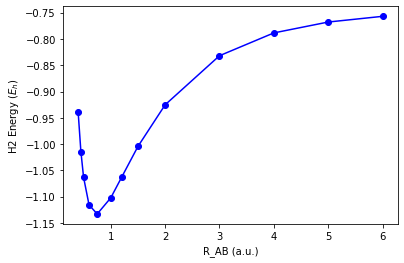

In [3]:
# method
method = 'SCF'

# basis set
basis = 'cc-pvtz'

# set computation options
psi4.set_options({'basis': basis,
                  'reference': 'rohf'})


mol_singlet = [psi4.geometry(h2_singlet.replace("**R**", str(r))) for r in rAB] 

HF_singlet = [psi4.energy(method, molecule=mol) for mol in mol_singlet]

psi4.core.clean()

plt.plot(rAB, HF_singlet, linestyle='-', marker='o', color='b') 
plt.xlabel('R_AB (a.u.)')
plt.ylabel('H2 Energy ($E_h$)')
plt.show()

D. Add code below to calculate the HF energies for the first excited state of H$_2$ and create a single plot of the PES of both the singlet and triplet states.

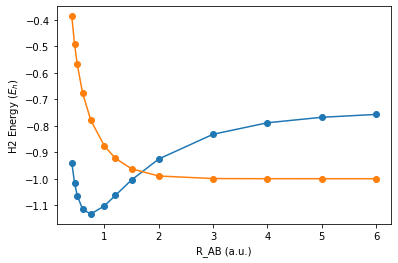

In [4]:
# Solution 
h2_triplet = """
0 3
H 
H 1 **R**
"""

mol_triplet = [psi4.geometry(h2_triplet.replace("**R**", str(r))) for r in rAB] 

HF_triplet = [psi4.energy(method, molecule=mol) for mol in mol_triplet]

psi4.core.clean()

plt.plot(rAB, HF_singlet, rAB, HF_triplet, linestyle='-', marker='o') 
plt.xlabel('R_AB (a.u.)')
plt.ylabel('H2 Energy ($E_h$)')
plt.show()

E. Use the following code to compute the lowest energy of H$_2$ and the corresponding value of $r_{AB}$. Confirm that this result is consistent with the PES above.

In [5]:
h2 = psi4.geometry(h2_singlet.replace("**R**", '1.0')) 
E_min = psi4.optimize(method, molecule=h2)

Rab_min = h2.z(1)-h2.z(0)      # units angstroms
Rab_min = Rab_min*0.5291772    # atomic units

psi4.core.clean()

print(f"The lowest Hartree-Fock energy of H2 is: {E_min} Eh at {Rab_min} a.u")

Optimizer: Optimization complete!
The lowest Hartree-Fock energy of H2 is: -1.132990267179331 Eh at 0.7343712946919878 a.u


### Thinking about the data: Part One

7. As a class, decide whether each of the following results depends on the basis set: <br><br> a) the equilibrium bond length of H$_2$ <br><br> b) the multiplicity of the lowest energy state at this distance <br><br> c) the multiplicity of the lowest energy state as $r_{AB}\rightarrow\infty$ <br><br>

8. Based on your pre-experiment predictions: <br><br> a) which state (singlet or triplet) converges to the correct energy <br><br> b) in what way(s) does HF theory fail to accurately predict the PES of H$_2$ <br><br>

9. If we associate each electron with one nucleus or the other, describe four possible arrangements of the two electrons, $e_1$ and $e_2$, with the two nuclei, H$_A$ and H$_B$.<br><br>

10. Assuming all four possible arrangements are equally likely: <br><br> a) what is the probability of only $e_1$ being associated with H$_A$? <br><br> b) what is the probability of only $e_2$ being associated with H$_A$? <br><br> c) what is the probability that H$_A$ has only one electron, $p($H$_A$.)? <br><br> d) what is the probability that H$_A$ has two electrons, $p($H$_A$:)? <br><br> e) what is the probability that H$_A$ has no electrons, $p($H$_A$)? <br><br> 

11. Which arrangement(s) become less likely as $r_{AB}\rightarrow\infty$? Explain your reasoning.

### Information
#### Table 1: Probabilities of an electron associated with a particular nucleus 

| config  | case 1 |case 2 | case 3
|---|---|---|---|
|p(H$_A$:)| 1/4 |0| 1/2
|p(H$_A$.)| 1/2 |1| 0
|p(H$_A$) | 1/4 |0| 1/2
|p(H$_B$:)| 1/4 |0| 1/2
|p(H$_B$.)| 1/2 |1| 0
|p(H$_B$) | 1/4 |0| 1/2

12. What was the assumption that led to the probabilities in case 1? <br><br>

13. For case 2: <br><br> a) what is the likelihood of finding both electrons associated with H$_A$? <br><br> b) if electron 1 is associated with H$_A$, where is electron 2? <br><br>

14. Describe the assumptions leading to the probabilities in case 2.<br><br>

15. Describe the assumptions leading to the probabilities in case 3.<br><br>

16. Which of the three cases assumes the locations of the electrons are correlated? <br><br>

17. Which of the three cases best matches your team's prediction for an H$_2$ molecule:<br><br> a) near equilibrium bond distances <br><br> b) near bond breaking distances <br><br>

18. What property of electrons is essential to include to calculate an accurate bond dissociation energy for H$_2$? Explain.

### Information

Recall the bonding and antibonding MOs from 1s atomic orbitals 

$$
\sigma(r) = \sqrt{\frac{1}{2}}[\phi_{1s_A}(r) +\phi_{1s_B}(r)]
$$
and
$$
\sigma^*(r) = \sqrt{\frac{1}{2}}[\phi_{1s_A}(r) -\phi_{1s_B}(r)].
$$

The HF wavefunction, for the closed-shell singlet electron configuration, $\sigma^2\sigma^{*0}$, is represented as a single Slater determinant

$$
\psi_1 = 
\left|\begin{array}{cc}\sigma(1)\alpha(1) & \sigma(1)\beta(1)\\
\sigma(2)\alpha(2) & \sigma(2)\beta(2)
\end{array}
\right|
$$

where the  notation $\sigma(1)$ is short-hand for the coordinates of electron 1, i.e. $\sigma(1)\equiv\sigma(r_1).$

### Pre-experiment Questions: Part Two

19. Confirm that the Slater determinant expands to:
$\psi_1 = \sigma(1)\sigma(2)[\alpha(1)\beta(2) - \alpha(2)\beta(1)]$
<br><br>

20. Recall, each molecular wavefunction contains both a spatial and spin component. In view of your answer above, write the spatial function for the ground state of H$_2$. <br><br>

21. Write a Slater determinant representing the excited state $\psi_2$ resulting from a double excitation $\sigma^0\sigma^{*2}$. <br><br>

22. Write the spatial function for this doubly excited state of H$_2$.<br><br>

23. Describe any similarites between the spatial function and the electron configuration for the ground and doubly excited state. <br><br>

24. Is there more than one possible Slater determinant representing an excited state resulting from a single excitation $\sigma^1\sigma^{*1}$? Explain. <br><br>

25. Propose two potential spatial functions corresponding to the electron configuration $\sigma^1\sigma^{*1}$? (Note: we will return to this in part x.)

### Experiment: Part Two

A. Excute the following code that defines the functions used to calculate the wavefunctions.

In [6]:
def phi1s(x,rN):
    # an unnormalized 1s orbital 
    return np.exp(-np.abs(x-rN))

def mo(x,rnuc,c):
    rA = -rnuc/2
    rB = rnuc/2
    cA = c[0]
    cB = c[1]
    out = cA*phi1s(x,rA)+cB*phi1s(x,rB)
    norm = np.sqrt(np.sum(out**2))
    return out/norm

# coefficients of the bonding and antibonding MOs
c_sigma = np.array([1,1])/np.sqrt(2)
c_sigma_star = np.array([1,-1])/np.sqrt(2)

B. Use the following code to assign the value of $r_{AB}$ in atomic units and subsequent list of positions.

In [7]:
# assign positions of the nuclei 
bond = Rab_min   # note: replace Rab_min with a different value when instructed  

# values corresponding to the coordinate r 
npt = int(bond/4*1000)
r = np.array([i for i in range(-npt,npt+1)])*.01
r1, r2 = np.meshgrid(r,r)

C. Use the following code to construct and plot the one-electron MOs $\sigma(1)$ and $\sigma^*(1)$ as a function of the coordinate $r_1$.

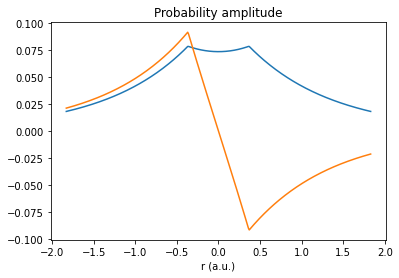

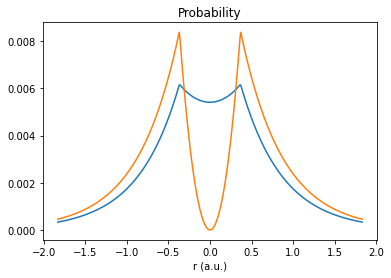

In [8]:
# evaluate and plot the bonding and antibonding MOs at each value of r
sigma = mo(r,bond,c_sigma)
sigma_star = mo(r,bond,c_sigma_star)

plt.plot(r,sigma,r,sigma_star)
plt.title('Probability amplitude')
plt.xlabel('r (a.u.)')
plt.show()

plt.plot(r,sigma**2,r,sigma_star**2)
plt.title('Probability')
plt.xlabel('r (a.u.)')
plt.show()

B. Use the following code to plot the spatial part of the ground state two-electron wavefunction $\sigma(1)\sigma(2)$ as a function of coordinates $r_1$ and $r_2$ in a two-dimensional contour plot.

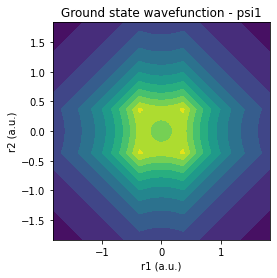

In [9]:
psi1 = mo(r1,bond,c_sigma)*mo(r2,bond,c_sigma)

# plot the wavefunction 
n_levels = 10
plt.contourf(r1,r2,psi1,n_levels)
plt.title('Ground state wavefunction - psi1')
plt.axis('square')
plt.xlabel('r1 (a.u.)')
plt.ylabel('r2 (a.u.)')
plt.show()

C. Add code below to plot the spatial part of the doubly excited two-electron wavefunction $\sigma^*(1)\sigma^*(2)$ as a function of coordinates $r_1$ and $r_2$ in a two-dimensional contour plot.

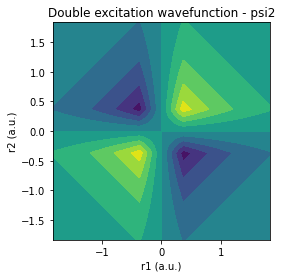

In [10]:
# Solution
psi2 = mo(r1,bond,c_sigma_star)*mo(r2,bond,c_sigma_star)

plt.contourf(r1,r2,psi2,n_levels)
plt.title('Double excitation wavefunction - psi2')
plt.axis('square')
plt.xlabel('r1 (a.u.)')
plt.ylabel('r2 (a.u.)')
plt.show()

D. Add code below to plot two potential spatial functions resulting from a single excitation. (Note: be sure not to use `psi4` as a variable name)

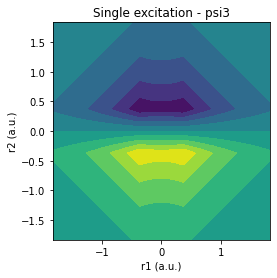

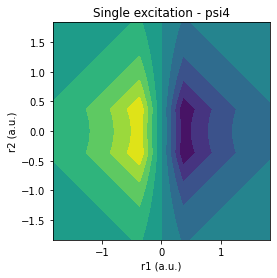

In [11]:
# Solution
psi3a = mo(r1,bond,c_sigma)*mo(r2,bond,c_sigma_star)
psi3b = mo(r1,bond,c_sigma_star)*mo(r2,bond,c_sigma)

plt.contourf(r1,r2,psi3a,n_levels)
plt.title('Single excitation - psi3')
plt.axis('square')
plt.xlabel('r1 (a.u.)')
plt.ylabel('r2 (a.u.)')
plt.show()


plt.contourf(r1,r2,psi3b,n_levels)
plt.title('Single excitation - psi4')
plt.axis('square')
plt.xlabel('r1 (a.u.)')
plt.ylabel('r2 (a.u.)')
plt.show()

### Thinking about the data: Part Two

26. In reference to the plots of the one-electron MOs: <br><br> a) Identify the positions of nucleus A and nucleus B.<br><br> b) Label each curve as either $\sigma$ or $\sigma^*$ and explain your reasoning. <br><br> c) Identify the bond length and explain how this result is consistent with the PES from part one. <br><br>

27. In reference to the contour plot of the two-electron ground state wavefunction: <br><br> a) Are there any nodes associated with this wavefunction? <br><br> b) Identify all possible positions of $e_2$ assuming $e_1$ is located on nucleus A. <br><br> c) Identify all possible positions of $e_1$ assuming $e_2$ located on nucleus A. <br><br> d) In which quadrant of the graph are both $e_1$ and $e_2$ associated with nucleus A? <br><br>

28. In reference to the contour plot of the doubly excited state wavefunction: <br><br> a) Identify the number of nodes associated with this wavefunction. <br><br> b) Is there a possibility that both $e_1$ and $e_2$ are associated with nucleus A? Explain.<br><br>

29. In reference to the contour plots of a singly excited state wavefunction: <br><br> a) Identify the number of nodes associated with the wavefunction. <br><br> b) Explain how it is possible to determine whether the $\sigma$ MO is associated with $e_1$ or $e_2$. <br><br> c) Is there a possibility that both $e_1$ and $e_2$ are associated with nucleus A? <br><br>

30. Identify which of the three cases presented in Table 1 best represents the probabilities of the two-electron ground state wavefunction at the equilibrium bond length.<br><br> 

31. Increase the distance between the nuclei by assigning a value to `bond` > Rab_min and re-evaluate the spatial part of the two-electron wavefunctions. Do any of your answers above depend on the value of $r_{AB}$? <br><br> 

32. In view Question 18 and the plot of the two-electron ground state wavefunction, what is the reason Hartree-Fock theory is unable to accurately model the ground state of H$_2$ as $r_{AB}\rightarrow\infty$? <br><br> 

33. Now, let's look at the resulting two-particle wavefunctions from the linear combination of two determinants. Add code below to plot both the addition and subtraction of the ground and doubly excited state.
$$
\psi_\pm = \psi_1\pm\psi_2
$$

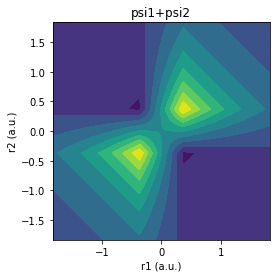

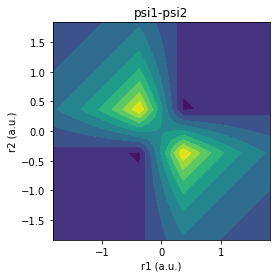

In [12]:
# Solution

psi1 = mo(r1,bond,c_sigma)*mo(r2,bond,c_sigma)
psi2 = mo(r1,bond,c_sigma_star)*mo(r2,bond,c_sigma_star)

plt.contourf(r1,r2,psi1+psi2,n_levels)
plt.title('psi1+psi2')
plt.xlabel('r1 (a.u.)')
plt.ylabel('r2 (a.u.)')
plt.axis('square')
plt.show()

plt.contourf(r1,r2,psi1-psi2,n_levels)
plt.title('psi1-psi2')
plt.xlabel('r1 (a.u.)')
plt.ylabel('r2 (a.u.)')
plt.axis('square')
plt.show()

34. Are there any nodes associated with these wavefunctions? <br><br> 

35. For $\psi_+$, if $e_1$ is on nucleus A, where is $e_2$ most likely to be found? <br><br> 

36. For $\psi_-$, if $e_1$ is on nucleus A, where is $e_2$ **not** likely to be found? <br><br> 

37. For each wavefunction, identify which of the three cases best represents the probabilities of the two electrons: <br><br> a) $\psi_+$ <br><br> b) $\psi_-$ <br><br>

38. In your own words, explain how the addition of multiple determinants could improve the accuracy of the Hartree Fock description of the ground state of H$_2$.

### Information

Configuration interaction (CI) calculations treat the wavefunction as a combination of multiple (sometimes very many!) determinants. For H$_2$ in a minimal basis, only single and double excitations are possible because there are only two electrons. CI with single and double excitations is called CISD.

A wavefunction is constructed as a linear combination of determinants, and the variational principle is again used to find the lowest energy.

Mixing configurations of the ground state (Hartree-Fock) single determinant with the doubly excited determinant is called CI doubles, or CID.
$$
\psi_\textrm{CID} = c_1\psi_1 + c_2\psi_2
$$
Additional determinants at the level of singles gives CISD. Triples makes CISDT, quadruples are CISDTQ, and so forth.

Could say something about the orders -- singles don't mix with the ground state by symmetry (I htink the number of nodes argument above should suffice to motivate or maybe prove this) where the doubles can. The singles can mix with the doubles, though. 

Something about counting the number of possibilities?

### Pre-experiment Questions: Part Three

### Experiment: Part Three

A. Use the following code to compute the CISD energy of H$_2$ for the same values of $r_{AB}$ used in the HF calculation. 

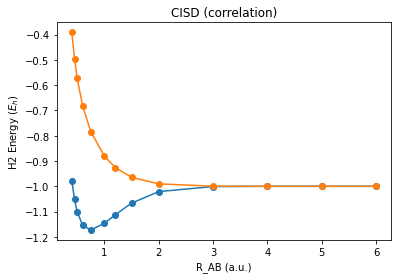

In [13]:
method = 'cisd'

CISD_singlet = [psi4.energy(method, molecule=mol) for mol in mol_singlet]
CISD_triplet = [psi4.energy(method, molecule=mol) for mol in mol_triplet]

plt.title('CISD (correlation)')
plt.plot(rAB, CISD_singlet, rAB, CISD_triplet, linestyle='-', marker='o') 
plt.xlabel('R_AB (a.u.)')
plt.ylabel('H2 Energy ($E_h$)')
plt.show()

B. Use the following code to compute the lowest CISD energy of H$_2$ and the corresponding value of $r_{AB}$.

In [14]:
h2 = psi4.geometry(h2_singlet.replace("**R**", '1.0')) 
E_min = psi4.optimize(method, molecule=h2)

Rab_min = h2.z(1)-h2.z(0)      # units angstroms
Rab_min = Rab_min*0.5291772    # atomic units

psi4.core.clean()

print(f"The lowest CISD energy of H2 is: {E_min} Eh at {Rab_min} a.u")

Performing finite difference calculations
 3 displacements needed ... 1 2 3
 3 displacements needed ... 1 2 3
 3 displacements needed ... 1 2 3
 3 displacements needed ... 1 2 3
 3 displacements needed ... 1 2 3
 3 displacements needed ... 1 2 3
Optimizer: Optimization complete!
The lowest CISD energy of H2 is: -1.1723366652045275 Eh at 0.7424424037219709 a.u


C. Add code below to create a single plot of both the HF and CISD H$_2$ ground state PES.

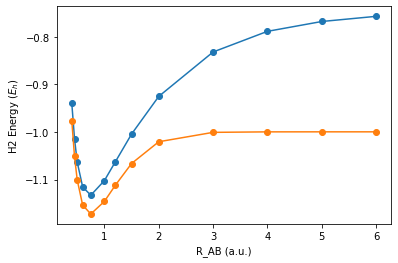

In [15]:
plt.plot(rAB, HF_singlet, rAB, CISD_singlet, linestyle='-', marker='o') 
plt.xlabel('R_AB (a.u.)')
plt.ylabel('H2 Energy ($E_h$)')
plt.show()

D. Add code below to create a single plot of both the HF and CISD H$_2$ first excited state PES.

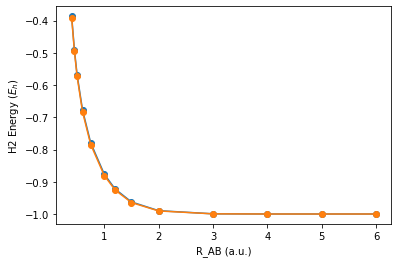

In [19]:
plt.plot(rAB, HF_triplet, rAB, CISD_triplet, linestyle='-', marker='o') 
plt.xlabel('R_AB (a.u.)')
plt.ylabel('H2 Energy ($E_h$)')
plt.show()

### Thinking about the data: Part Three

39. Compare the lowest ground state CISD energy to the HF calculation. <br><br> a) What is the energy difference in units of kcal/mol? (Hint: 1 Ha = 627.509 kcal mol-1.) <br><br> b) Which energy is more correct? Why? <br><br>

40. Compare the ground state CISD PES to the HF calculation as $r_{AB}\rightarrow\infty$. Which is more correct? Why? <br><br>

41. Compare the first excited state CISD PES to the HF calculation. What does this result suggest...

## The correlation that HF gets correct -- exchange correlation

Let's return to the singly excited CSFs considering both space and spin.

If we have two MOs, each occupied by one electron, and each electron with two spins, how many ways of arranging the electrons are there?

The total wavefunction must be antisymmetric with respect to exchange. Because the wavefunction factorizes in to space and spin, either the spatial or spin parts of the wavefunction must be antisymmetric. If the spatial part is symmetric, the spin part must be antisymmetric and vice versa. The resulting combinations are a singlet and a three triplet states.

The open-shell singlet is
$$
^0\Psi = (\sigma(1)\sigma^*(2)+\sigma^*(1)\sigma(2))[\alpha(1)\beta(2)-\alpha(2)\beta(1)] 
$$
The three triplets are
\begin{align}
^3_1\Psi &= (\sigma(1)\sigma^*(2)-\sigma^*(1)\sigma(2))\alpha(1)\alpha(2)\\ 
^3_0\Psi &= (\sigma(1)\sigma^*(2)-\sigma^*(1)\sigma(2))[\alpha(1)\beta(2)+\alpha(2)\beta(1)] \\
^3_{-1}\Psi &= (\sigma(1)\sigma^*(2)-\sigma^*(1)\sigma(2))\beta(1)\beta(2)
\end{align}




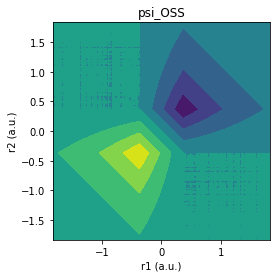

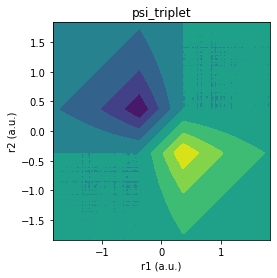

In [17]:
psi_OSS = mo(r1,bond,c_sigma)*mo(r2,bond,c_sigma_star)+mo(r1,bond,c_sigma_star)*mo(r2,bond,c_sigma)
psi_triplet = mo(r1,bond,c_sigma)*mo(r2,bond,c_sigma_star)-mo(r1,bond,c_sigma_star)*mo(r2,bond,c_sigma)


plt.contourf(r1,r2,psi_OSS)
plt.title('psi_OSS')
plt.xlabel('r1 (a.u.)')
plt.ylabel('r2 (a.u.)')
plt.axis('square')
plt.show()

plt.contourf(r1,r2,psi_triplet)
plt.title('psi_triplet')
plt.xlabel('r1 (a.u.)')
plt.ylabel('r2 (a.u.)')
plt.axis('square')
plt.show()


Which of the two wavefunctions localizes the electrons on opposite nuclei? 

Which puts them on the same nuclei?

How many nodes are there in these wavefunctions?

In the $^3_1\Psi$, the cancellation of electrons is called a "Fermi hole." Because, for a triplet, the spins are identical, the spatial part of the wavefunction must have the minus sign, and the electrons cannot be in the same location. The triplet energy is correct because of this cancellation.

Notice that the open-shell singlet tends to pair the electrons, in what is called a "Fermi heap." Propose a physical interpretation of the open-shell singlet state.

**Information** Any time multiple electron configurations become close in energy, HF is in trouble because it is built on a single determinant. 

## Correlation in the bonding region
HF failed spectacularly to describe the dissociation of H$_2$. It is much better in the bonding regions, but chemical accuracy often requires incorporating additional electron correlation effects. 


TO DO: Propose some molecules and look at changes in the bonding properties?


## Other approaches to adding electron correlation
### CI S D T Q H ... Full CI
Systematic improvements but the number of determinants grows really fast, so this is a mess.

### MP2
It involves the double excitations! 

Nonvariational nature means it tends to overestimate corrections.

### Coupled-Cluster
A way to get higher orders of single- and double-excitation operators...

It is not variational but seems very close to the variational results for reasons that are beyond me. 

## Dispersion interactions are electron correlation effects



[3.5, 3.75, 4, 4.5, 5, 6, 10]

r_min/a0	E_min/a.u.	dE/a.u.
 5.00000	-1053.626	-0.000007

SCF time elapsed 4.622472063987516 s

r_min/a0	E_min/a.u.	dE/a.u.
 4.00000	-1054.102	-0.000257

MP2 time elapsed 8.124989025993273 s

r_min/a0	E_min/a.u.	dE/a.u.
 4.00000	-1054.133	-0.000165

CCSD time elapsed 51.31894156098133 s

r_min/a0	E_min/a.u.	dE/a.u.
 4.00000	-1054.086	-0.000120

CISD time elapsed 381.739090306015 s


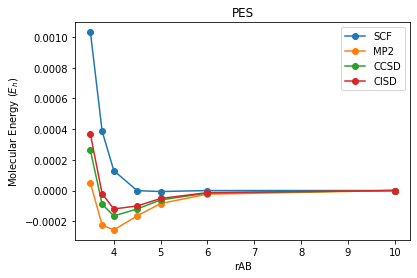

done


In [18]:

# singlet H2 has a charge of 0, spin multiplicity of 1 (m_s=0)
he_dimer = """
0 1
He 
He 1 {}
"""

be_dimer = """
0 1
Be 
Be 1 {}
"""

ar_dimer = """
0 1
Ar 
Ar 1 {}
"""


# for He
rAB_list = [2.75, 2.87, 3, 3.5, 4, 10]

# for Ar
rAB_list = [3.5, 3.75, 4, 4.5, 5, 6, 10]

print(rAB_list)

def scan(geom,rAB,method='SCF',basis='sto-3g'):
    t_start = time.perf_counter()
    
    # set computation options
    psi4.set_options({'basis': basis,
                  'reference': 'rohf'})

    e = ['']*len(rAB)
    count = -1
    for rAB in rAB_list:
        #print(rAB)
        count = count+1
        mol = psi4.geometry(geom.format(rAB))
        e[count] = psi4.energy(method,molecule=mol)
        
    t_diff = time.perf_counter() - t_start
    #print(F'Energy at the minimum {np.min(e)} Eh located at {rAB_list[np.argmin(e)]} a0')
    r_min = rAB_list[np.argmin(e)]
    e_min = np.min(e)
    de = e_min - e[-1]
    print(F'\nr_min/a0\tE_min/a.u.\tdE/a.u.')
    #print(F'{r_min}\t{e_min}\t{de}')
    print('%8.5f\t%8.3f\t%8.6f' % (r_min, e_min, de))
    print(F'\n{method} time elapsed {t_diff} s')
    psi4.core.clean()
    return e

def listdiff(e,ind=-1):
    return list(np.array(e)-np.array(e[ind]))

mol = ar_dimer

basis = 'cc-pVTZ'
#basis = 'cc-pVDZ'

method = 'SCF'
t_start = time.perf_counter()
e_hf = scan(mol,rAB_list,method,basis)
#print(e_hf)

method = 'MP2' #1.5 times slower
e_mp2 = scan(mol,rAB_list,method,basis)
#print(e_mp2)

method = 'CCSD' #10 times slower
e_ccsd = scan(mol,rAB_list,method,basis)
#print(e_ccsd)

method = 'CISD' #100 times slower
e_cisd = scan(mol,rAB_list,method,basis)
#print(e_cisd)


# Visualize energy profile
x = rAB_list
#y1 = list(np.array(e_hf)-np.array(e_hf[-1]))
y1 = listdiff(e_hf)
y2 = listdiff(e_mp2)
y3 = listdiff(e_ccsd)
y4 = listdiff(e_cisd)
plt.title('PES')
plt.plot(x,y1,'o-')
plt.plot(x,y2,'-o')
plt.plot(x,y3,'-o')
plt.plot(x,y4,'-o')
plt.xlabel('rAB')
plt.ylabel('Molecular Energy ($E_h$)')
plt.legend(('SCF','MP2','CCSD','CISD'))
plt.show()

print('done')

